In [1]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Initializing parameters
R=8.31; k=389.6; A=0.01; L=0.3; n=1; Vt=10 

In [3]:
cv=(3/2)*R; cp=(5/2)*R; C=(k*A)/(n*cp*L); C1 = (k*A)/L
print(C)

0.6251103088648214


In [4]:
# Initializing state variables
T10 = 400; T20 = 200
V10=(2/3)*Vt; V20=(1/3)*Vt
P10=(n*R*T10)/V10; P20=(n*R*T20)/V20
print(T10,V10,P10)
print(T20,V20,P20)

400 6.666666666666666 498.6
200 3.333333333333333 498.6


In [5]:
# Initializing derivatives
DT10 = -C*(T10-T20)
DT20 = C*(T10-T20)
DV10 = -C*(V10-V20)
DV20 = C*(V10-V20)
print(DT10, DT20)
print(DV10, DV20)

-125.02206177296429 125.02206177296429
-2.0837010295494047 2.0837010295494047


In [6]:
# Analytic solutions
def T1(t):
    return 0.5*(T10+T20) + 0.5*(T10-T20)*math.exp(-2*C*t)
def V1(t):
    return 0.5*(V10+V20) + 0.5*(V10-V20)*math.exp(-2*C*t)
def T2(t):
    return 0.5*(T10+T20) + 0.5*(T20-T10)*math.exp(-2*C*t)
def V2(t):
    return 0.5*(V10+V20) + 0.5*(V20-V10)*math.exp(-2*C*t)

In [7]:
# Filling Exact solutions
t = 0.; tfinal = 5; Delta_t = 0.01
Vector_T1 = []
Vector_T2 = []
Vector_V1 = []
Vector_V2 = []
Vector_t = []
while(t < tfinal):
    Vector_T1.append(T1(t))
    Vector_T2.append(T2(t))
    Vector_V1.append(V1(t))
    Vector_V2.append(V2(t)) 
    Vector_t.append(t)
    t=t+Delta_t
    #print(t, Vector_T1, Vector_T2)

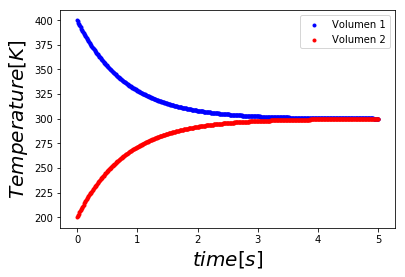

In [8]:
plt.scatter(Vector_t, Vector_T1, color='blue', label="Volumen 1", marker= ".")
plt.scatter(Vector_t, Vector_T2, color='red', label="Volumen 2", marker= ".")
plt.xlabel("$time[s]$",  fontsize = 20)
plt.ylabel("$Temperature[K]$",  fontsize = 20)
plt.legend()
plt.show()

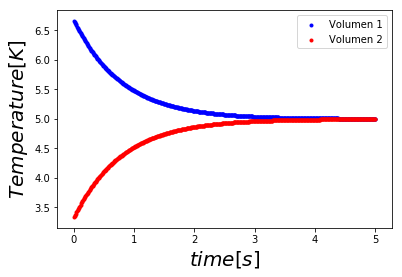

In [9]:
plt.scatter(Vector_t, Vector_V1, color='blue', label="Volumen 1", marker= ".")
plt.scatter(Vector_t, Vector_V2, color='red', label="Volumen 2", marker= ".")
plt.xlabel("$time[s]$",  fontsize = 20)
plt.ylabel("$Temperature[K]$",  fontsize = 20)
plt.legend()
plt.show()

In [10]:
# Numeric solutions
t = 0.; tfinal = 5; Delta_t = 0.01
NV1=V10;NV2=V20;
NT1=T10;NT2=T20;

NVector_t = []
NVector_V1 = []
NVector_V2 = []
NVector_T1 = []
NVector_T2 = []

NVector_E1 = []
NVector_E2 = []
NVector_ET = []

entropy1= 2;
entropy2= 0.6;

E0=n*R*(T10+T20)
NVector_Energy = []

while(t < tfinal):
    NVector_t.append(t)
    NVector_V1.append(NV1)
    NVector_V2.append(NV2)
    NVector_T1.append(NT1)
    NVector_T2.append(NT2) 
    
    NVector_Energy.append(E0/(n*R*(NT1+NT2)))
    
    Delta_V1 = -C*(NV1-NV2)*Delta_t
    Delta_V2 = C*(NV1-NV2)*Delta_t    
    
    Delta_T1 = -C*(NT1-NT2)*Delta_t
    Delta_T2 = C*(NT1-NT2)*Delta_t
    
    EDelta_T1 = -C1*(NT1-NT2)*Delta_t
    EDelta_T2 = C1*(NT1-NT2)*Delta_t
     
    #Entropy
    Delta_E1 = EDelta_T1/NT1
    entropy1+=Delta_E1 
    NVector_E1.append(entropy1)
    Delta_E2 = EDelta_T2/NT2  
    entropy2+=Delta_E2 
    NVector_E2.append(entropy2)
    
    NVector_ET.append(entropy1 + entropy2) 
    
    print(t, NV1, NV2, NT1, NT2,  NVector_E1, NVector_E2, NVector_ET)
    
    NV1+=Delta_V1
    NV2+=Delta_V2
    NT1+=Delta_T1
    NT2+=Delta_T2
    t=t+Delta_t

0.0 6.666666666666666 3.333333333333333 400 200 [1.9350666666666667] [0.7298666666666667] [2.6649333333333334]
0.01 6.645829656371172 3.354170343628827 398.74977938227033 201.25022061772964 [1.9350666666666667, 1.8707440997561036] [0.7298666666666667, 0.857313033116159] [2.6649333333333334, 2.7280571328722627]
0.02 6.62525315467451 3.3747468453254883 397.5151892804707 202.48481071952932 [1.9350666666666667, 1.8707440997561036, 1.8070284334232198] [0.7298666666666667, 0.857313033116159, 0.9823986880472365] [2.6649333333333334, 2.7280571328722627, 2.7894271214704562]
0.03 6.604933904644469 3.3950660953555305 396.2960342786682 203.70396572133185 [1.9350666666666667, 1.8707440997561036, 1.8070284334232198, 1.7439157908364613] [0.7298666666666667, 0.857313033116159, 0.9823986880472365, 1.1051812263322054] [2.6649333333333334, 2.7280571328722627, 2.7894271214704562, 2.849097017168667]
0.04 6.58486869006767 3.4151313099323293 395.09212140406026 204.90787859593976 [1.9350666666666667, 1.870744

1.1500000000000008 5.392196906729611 4.607803093270392 323.5318144037767 276.46818559622335 [1.9350666666666667, 1.8707440997561036, 1.8070284334232198, 1.7439157908364613, 1.6814022849274044, 1.6194840191335595, 1.5581570881341749, 1.4974175785788402, 1.4372615698086961, 1.3776851345700654, 1.3186843397203276, 1.2602552469258688, 1.2023939133519415, 1.1450963923442854, 1.088358734102358, 1.0321769863440386, 0.9765471949616745, 0.9214654046693441, 0.8669276596412225, 0.8129300041409395, 0.7594684831418282, 0.7065391429379705, 0.654138031745951, 0.6022612002972403, 0.5509047024211327, 0.5000645956181726, 0.44973694162400923, 0.39991780696362556, 0.35060326349589604, 0.30178938894843055, 0.25347226744267154, 0.20564799000921505, 0.15831265509333386, 0.1114623690506858, 0.06509324663319638, 0.019201411465110764, -0.02621700349078525, -0.07116585547676932, -0.11564899149360136, -0.15967024786374137, -0.20323344980434557, -0.24634241101001578, -0.28900093324527176, -0.33121280594671254, -0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [11]:
print(len(NVector_T1),
len(NVector_T2),
len(NVector_V1),
len(NVector_V2))

501 501 501 501


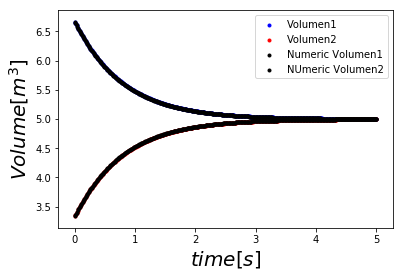

In [12]:
plt.scatter(Vector_t, Vector_V1, color='blue', label="Volumen1", marker= ".")
plt.scatter(Vector_t, Vector_V2, color='red', label="Volumen2", marker= ".")
plt.scatter(NVector_t, NVector_V1, color='black', label="Numeric Volumen1", marker= ".")
plt.scatter(NVector_t, NVector_V2, color='black', label="NUmeric Volumen2", marker= ".")
plt.xlabel("$time[s]$",  fontsize = 20)
plt.ylabel("$Volume[m^{3}]$",  fontsize = 20)
plt.legend()
plt.show()

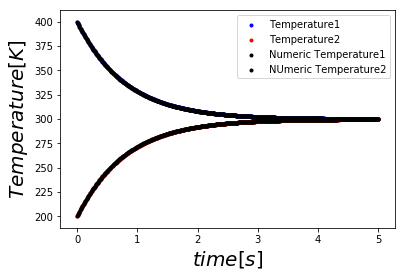

In [13]:
plt.scatter(Vector_t, Vector_T1, color='blue', label="Temperature1", marker= ".")
plt.scatter(Vector_t, Vector_T2, color='red', label="Temperature2", marker= ".")
plt.scatter(NVector_t, NVector_T1, color='black', label="Numeric Temperature1", marker= ".")
plt.scatter(NVector_t, NVector_T2, color='black', label="NUmeric Temperature2", marker= ".")
plt.xlabel("$time[s]$",  fontsize = 20)
plt.ylabel("$Temperature[K]$",  fontsize = 20)
plt.legend()
plt.show()

In [14]:
# Filling pressure vectors
Vector_P1=[]
for i in range(len(Vector_V1)):
    Vector_P1.append((n*R*Vector_T1[i])/(Vector_V1[i]))
Vector_P2=[]
for i in range(len(Vector_V2)):
    Vector_P2.append((n*R*Vector_T2[i])/(Vector_V2[i]))
# Numerical Values
NVector_P1=[]
for i in range(len(NVector_V1)):
    NVector_P1.append((n*R*NVector_T1[i])/(NVector_V1[i]))
NVector_P2=[]
for i in range(len(NVector_V2)):
    NVector_P2.append((n*R*NVector_T2[i])/(NVector_V2[i]))

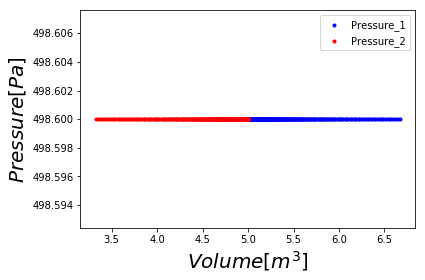

In [15]:
# Plotting the exact preassure
plt.scatter(Vector_V1, Vector_P1, color='blue', label="Pressure_1", marker= ".")
plt.scatter(Vector_V2, Vector_P2, color='red', label="Pressure_2", marker= ".")
plt.xlabel("$Volume[m^{3}]$",  fontsize = 20)
plt.ylabel("$Pressure[Pa]$",  fontsize = 20)
plt.legend()
plt.show()

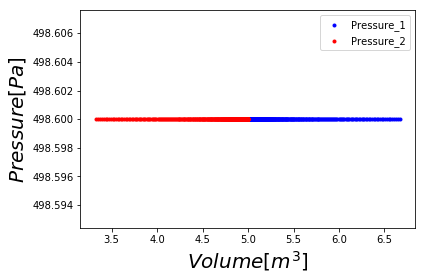

In [16]:
# Plotting the exact preassure
plt.scatter(NVector_V1, NVector_P1, color='blue', label="Pressure_1", marker= ".")
plt.scatter(NVector_V2, NVector_P2, color='red', label="Pressure_2", marker= ".")
plt.xlabel("$Volume[m^{3}]$",  fontsize = 20)
plt.ylabel("$Pressure[Pa]$",  fontsize = 20)
plt.legend()
plt.show()

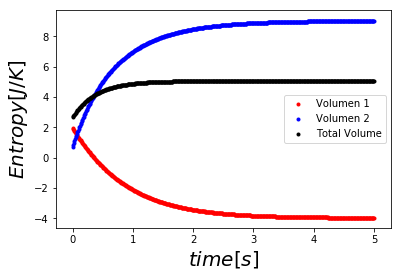

In [17]:
plt.scatter(NVector_t, NVector_E1, color='red', label="Volumen 1", marker= ".")
plt.scatter(NVector_t, NVector_E2, color='blue', label="Volumen 2", marker= ".")
plt.scatter(NVector_t, NVector_ET, color='black', label="Total Volume", marker= ".")
plt.xlabel("$time[s]$",  fontsize = 20)
plt.ylabel("$Entropy [J/K]$",  fontsize = 20)
plt.legend()
plt.show()

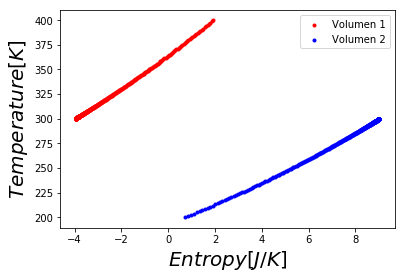

In [18]:
plt.scatter(NVector_E1, NVector_T1, color='red', label="Volumen 1", marker= ".")
plt.scatter(NVector_E2, NVector_T2, color='blue', label="Volumen 2", marker= ".")
plt.xlabel("$Entropy [J/K]$",  fontsize = 20)
plt.ylabel("$Temperature[K]$",  fontsize = 20)
plt.legend()
plt.show()

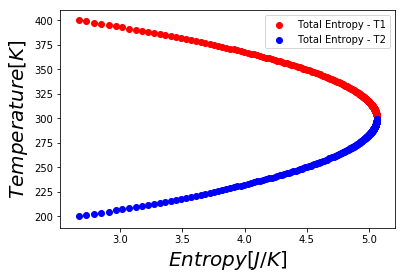

In [19]:
plt.scatter(NVector_ET, NVector_T1, color='red', label="Total Entropy - T1", marker= "o")
plt.scatter(NVector_ET, NVector_T2, color='blue', label="Total Entropy - T2", marker= "o")
plt.xlabel("$Entropy [J/K]$",  fontsize = 20)
plt.ylabel("$Temperature[K]$",  fontsize = 20)
plt.legend()
plt.show()

In [20]:
# checking Delta entropy given by thermodynamic : constant pressure
DeltaS1 = n*cp*math.log((0.5)/(2/3))
DeltaS2 = n*cp*math.log((0.5)/(1/3))
print(DeltaS1, DeltaS2, DeltaS1+DeltaS2)

-5.976595055185749 8.423537620947116 2.4469425657613666


In [21]:
5.1-2.6

2.4999999999999996

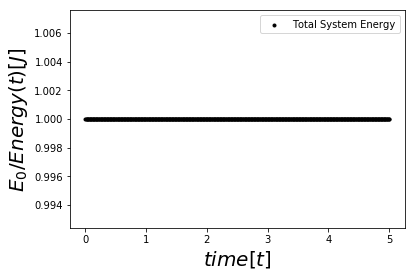

In [22]:
plt.scatter(NVector_t, NVector_Energy, color='black', label="Total System Energy", marker= ".")
plt.xlabel("$time [t]$",  fontsize = 20)
plt.ylabel("$E_{0}/Energy(t) [J]$",  fontsize = 20)
plt.legend()
plt.show()

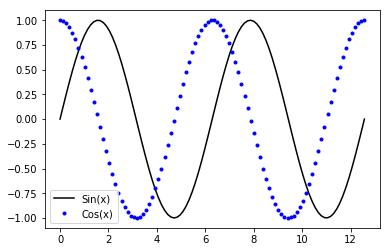

In [23]:
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y,'k', x, z, 'b.')
plt.legend(['Sin(x)','Cos(x)'])
plt.show()